In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avazu-ctr-prediction/sampleSubmission.gz
/kaggle/input/avazu-ctr-prediction/train.gz
/kaggle/input/avazu-ctr-prediction/test.gz


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
n = 40428967  #total number of records in the clickstream data 
sample_size = 3000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))

with gzip.open('../input/avazu-ctr-prediction/train.gz') as f:
    train = pd.read_csv(f,skiprows = skip_values)
train['hour'] = pd.to_datetime(train['hour'],format = '%y%m%d%H')

In [4]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10004574413841529209,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,-1,79
1,10007944429976961145,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
2,10009910814812262951,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,a079ef6b,2347f47a,...,1,2,18993,320,50,2161,0,35,100131,157
3,10013076841337920650,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
4,10017891063419751227,0,2014-10-21,1005,0,ceea3181,6225315b,f028772b,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,100084,79


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 24 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                uint64        
 1   click             int64         
 2   hour              datetime64[ns]
 3   C1                int64         
 4   banner_pos        int64         
 5   site_id           object        
 6   site_domain       object        
 7   site_category     object        
 8   app_id            object        
 9   app_domain        object        
 10  app_category      object        
 11  device_id         object        
 12  device_ip         object        
 13  device_model      object        
 14  device_type       int64         
 15  device_conn_type  int64         
 16  C14               int64         
 17  C15               int64         
 18  C16               int64         
 19  C17               int64         
 20  C18               int64         
 21  C19     

In [6]:
train.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [7]:
train.describe(include = 'all')

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,3.000000e+06,3.000000e+06,3000000,3.000000e+06,3.000000e+06,3000000,3000000,3000000,3000000,3000000,...,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
unique,NaN,NaN,240,NaN,NaN,3269,3927,23,4468,275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2014-10-22 09:00:00,NaN,NaN,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,33307,NaN,NaN,1084109,1123759,1227255,1915891,2020006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2014-10-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-10-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.220926e+18,1.699453e-01,NaN,1.004969e+03,2.879123e-01,NaN,NaN,NaN,NaN,NaN,...,1.015494e+00,3.317533e-01,1.884412e+04,3.188808e+02,6.001793e+01,2.112911e+03,1.432090e+00,2.272356e+02,5.320139e+04,8.338072e+01
std,5.325967e+18,3.755848e-01,NaN,1.093073e+00,5.051458e-01,NaN,NaN,NaN,NaN,NaN,...,5.266542e-01,8.548910e-01,4.956686e+03,2.122325e+01,4.706789e+01,6.090761e+02,1.326431e+00,3.510064e+02,4.995781e+04,7.028457e+01
min,8.396642e+12,0.000000e+00,NaN,1.001000e+03,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.609886e+18,0.000000e+00,NaN,1.005000e+03,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01


In [8]:
X = train.drop('click',axis=1)
y = train.click

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [10]:
num_cols = X.select_dtypes(include = ['int','float']).columns.tolist()
categorical_cols = X.select_dtypes(include = ['object']).columns.tolist()
print(num_cols)
print(categorical_cols)

['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


## Hashing


In [11]:
for col in categorical_cols:
	X_train[col] = X_train[col].apply(lambda x: hash(x))
    
for col in categorical_cols:
    X_test[col] = X_test[col].apply(lambda x:hash(x))

## Scaling the Numerical Values

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train[num_cols] = std.fit_transform(X_train[num_cols])
X_test[num_cols] = std.transform(X_test[num_cols])

In [13]:
X_train['user_info'] = X_train.device_ip + X_train.device_model + X_train.device_id
X_train = X_train.drop(['device_id','device_ip','device_model','id','hour'],axis=1)
    
X_train['device_info'] = X_train.device_type + X_train.banner_pos + X_train.device_conn_type
X_train = X_train.drop(['banner_pos','device_conn_type','device_type'],axis=1)

X_test['user_info'] = X_test.device_ip + X_test.device_model + X_test.device_id
X_test = X_test.drop(['device_id','device_ip','device_model','id','hour'],axis=1)
    
X_test['device_info'] = X_test.device_type + X_test.banner_pos + X_test.device_conn_type
X_test = X_test.drop(['banner_pos','device_conn_type','device_type'],axis=1)

## Model - Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train,y_train)
print('Train Score:',tree.score(X_train,y_train))
print('Test Score:',tree.score(X_test,y_test))

Train Score: 0.8340942857142857
Test Score: 0.8330722222222222


In [15]:
from sklearn.metrics import roc_curve,confusion_matrix,precision_score,recall_score,roc_auc_score
y_score = tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc_score = roc_auc_score(y_test,y_score[:,1])
print(roc_auc_score)

0.7052664846164568


In [16]:
y_pred = tree.predict(X_test)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(precision, recall))

Precision: 0.7947786600545169, Recall: 0.8330722222222222


In [17]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[739502   7314]
 [142921  10263]]


In [18]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred = tree.fit(X_train,y_train).predict(X_test) 
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_pred))
    prec = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    print("Precision: %s, Recall: %s" %(prec, recall))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[739504   7312]
 [142925  10259]]
Precision: 0.7947710013665857, Recall: 0.83307
Evaluating tree with max_depth = 3
Confusion matrix: 
[[739501   7315]
 [142920  10264]]
Precision: 0.7947776713552092, Recall: 0.8330722222222222
Evaluating tree with max_depth = 5
Confusion matrix: 
[[739501   7315]
 [142920  10264]]
Precision: 0.7947776713552092, Recall: 0.8330722222222222
Evaluating tree with max_depth = 10
Confusion matrix: 
[[739496   7320]
 [142913  10271]]
Precision: 0.7947823630069799, Recall: 0.8330744444444445
Evaluating tree with max_depth = 15
Confusion matrix: 
[[739499   7317]
 [142918  10266]]
Precision: 0.7947756950738907, Recall: 0.8330722222222222
Evaluating tree with max_depth = 20
Confusion matrix: 
[[739503   7313]
 [142917  10267]]
Precision: 0.7948037323265112, Recall: 0.8330777777777778


In [19]:
from sklearn.model_selection import KFold,cross_val_score
for max_depth_val in [3, 5, 10]:
    k_fold = KFold(n_splits = 4)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred = tree.fit(X_train, y_train).predict(X_test) 
  
    cv_precision = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    precision = recall_score(y_test, y_pred, average = 'weighted')
    print("Cross validation Recall: %s" %(cv_precision.mean()))
    print("Test Recall: %s" %(precision.mean()))

Evaluating Decision Tree for max_depth = 3
Cross validation Recall: 0.83037
Test Recall: 0.8330755555555556
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: 0.8311604761904762
Test Recall: 0.8330677777777777
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: 0.8335938095238095
Test Recall: 0.8330822222222222


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10], 
    'n_estimators':[2,5,10,20,50],
    'min_samples_split': [2, 3, 4],
    'max_features' : ['log2']
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, n_iter = 10)

model = rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 20.6min finished


In [21]:
rf_search.best_params_

{'n_estimators': 5,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [22]:
clf_rf = RandomForestClassifier(n_estimators= 20,
 min_samples_split= 2,
 max_features= 'log2',
 max_depth= 10,
 bootstrap= True,
 random_state=42)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=20,
                       random_state=42)

In [23]:
y_test_pred = clf_rf.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))
prec = precision_score(y_test, y_test_pred, average = 'weighted')
recall = recall_score(y_test, y_test_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))

[[740755   6061]
 [144420   8764]]
Precision: 0.7950296111884119, Recall: 0.8327988888888889


In [24]:
rf_prob = clf_rf.predict_proba(X_test)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_prob[:,1])

In [25]:
import xgboost as xgb
from sklearn.metrics import roc_curve,auc,confusion_matrix,precision_score,recall_score,roc_auc_score
params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "logloss",
    "eta":0.1,
    "max_depth": 8,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
}
xgclf=xgb.XGBClassifier(**params)
xgclf.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='logloss',
        verbose=False)
xgpred=xgclf.predict_proba(X_test)

[12:08:49] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [26]:
from sklearn import metrics 
#y_score = xgclf.predict_proba(x_test)
#fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc_score = metrics.roc_auc_score(y_test,xgpred[:,1])
print(roc_auc_score)
print(xgclf.score(X_test,y_test))
xgb_fpr,xgb_tpr,_ = roc_curve(y_test,xgpred[:,1])

0.7379208535268862
0.8339044444444444


In [27]:
from sklearn.model_selection import KFold,cross_val_score
# Set up k-fold
k_fold = KFold(n_splits = 5)

# Evaluate precision and recall for each fold
precision = cross_val_score(
  xgclf, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
recall = cross_val_score(
  xgclf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
print("Precision scores: %s" %(precision.mean())) 
print("Recall scores: %s" %(recall.mean()))
print(k_fold)

[12:13:14] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:16:25] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:19:45] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:22:53] WARNI

In [28]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Text(0.5, 1.0, 'AUC-ROC Curve')

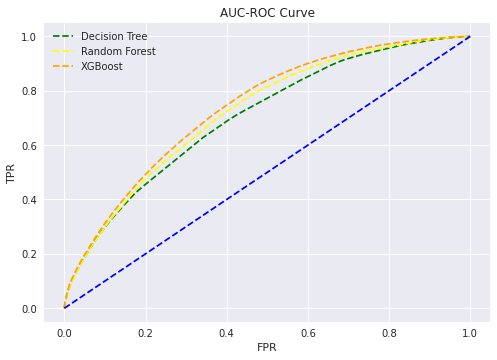

In [29]:
plt.style.use('seaborn')
plt.plot(fpr,tpr,linestyle = '--',color = 'green',label='Decision Tree')
plt.plot(rf_fpr,rf_tpr,linestyle = '--',color = 'yellow',label='Random Forest')
plt.plot(xgb_fpr,xgb_tpr,linestyle = '--',color = 'orange',label='XGBoost')
plt.plot(p_fpr,p_tpr,linestyle='--',color = 'blue')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')